In [48]:
import xray as xr
import matplotlib.pyplot as plt
import pickle
import cmocean as cmo
import numpy as np
from scipy.spatial import cKDTree
import pandas as pd
import pickle 

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib notebook

In [52]:
BASE_DIR = '/home/tparente/danilo/mestrado/artigo_tg/'
DATA_DIR = BASE_DIR + 'simulacoes/val2/'      


### Importando saída do modelo - sECOM

In [3]:
# importar grade do modelo
ncfile = xr.open_dataset(DATA_DIR+'gcmplt.cdf')

lon = ncfile['lon'].data
lat = ncfile['lat'].data

In [4]:
lon[lon == 0.0] = np.nan
lat[lon == 0.0] = np.nan

<IPython.core.display.Javascript object>


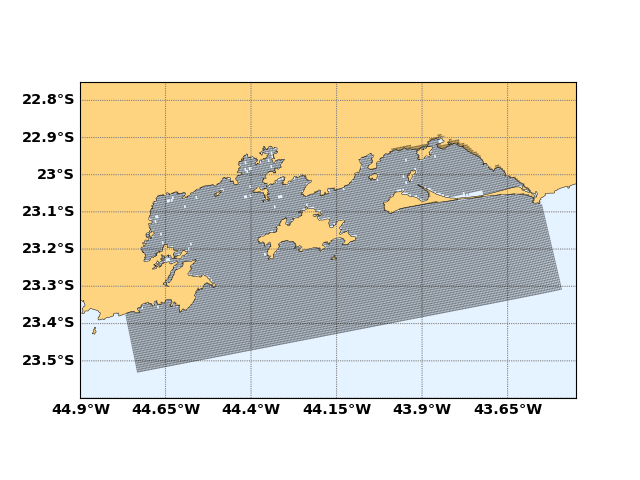

In [5]:
# criar mapa
m=pickle.load(open(BASE_DIR+"rotinas/bigmap.p","rb"))

# plotar outras coisas do mapa
m.drawcoastlines(linewidth=0.4) #linha de costa em alta resolução
m.drawmapboundary(fill_color='#e5f2ff') # fill_color colore o oceano
m.fillcontinents(color='#ffd480') # colorir o continente

# definir meridianos e paralelos para plotar no mapa
meridians=np.arange(-44.9,-33.4,0.25)
parallels=np.arange(-23.6,-22.75,0.1)
# desenhar meridianos e paralelos conforme definido acima
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=13,fontweight='bold',color='gray')
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=13,fontweight='bold',color='gray')

# plotar grade
m.plot(lon,lat,'k',alpha=.3, latlon=True)
m.plot(lon.T,lat.T,'k',alpha=.3, latlon=True)

m.plot(lon[193,26], lat[193,26], 'r', latlon=True)

In [6]:
# localizacao do terminal da ilha guaiba

ilat = -23.00000000
ilon = -44.01916667


In [8]:
lo = lon.ravel()
la = lat.ravel()

coords = []

for i,j in zip(la,lo):
    coords.append([i,j])

coords = np.array(coords)

locations_name = ['Terminal Ilha Guaiba']
locations_posi = [[ilat,ilon]]

locs = np.asarray(locations_posi)

tree = cKDTree(coords)
# procura em tree os pontos mais próximos dos pontos definidos acima
dists,indexes = tree.query(locs,k=1)

pontos = []

for index in indexes:
    pontos.append(coords[index])

# converter de lista para array
pontos = np.asarray(pontos)

# findind indexes from lat and lon
ind = []

for p in pontos:
    ind.append(np.where(lon == p[1]))

ind = np.asarray(ind)

# vetores para separar i e j para facilitar resgatar os dados de concentração
iss=[]
jss=[]

for i,j in ind:
    iss.append(int(i))
    jss.append(int(j))

In [9]:
iss,jss

([193], [26])

In [149]:
elev = ncfile['elev'].data[:,iss,jss]

In [152]:
wv = ncfile['wu'].data[:,iss,jss]
wv

array([[-3.75400577],
       [-1.19945062],
       [-3.25041963],
       [-4.82069277],
       [-3.11765601],
       [-3.86845716],
       [-6.59697843],
       [-1.11246756],
       [ 2.4767282 ],
       [-0.75537921],
       [-4.00579884],
       [-6.22157785],
       [-3.95544022],
       [-4.34457497],
       [-5.63100865],
       [-2.42636958],
       [-0.12360751],
       [-0.51274225],
       [-1.8129101 ],
       [-0.93392339],
       [ 2.49046236],
       [ 4.70166332],
       [ 2.51335264],
       [-2.22493513],
       [-0.44864947],
       [ 4.47733859],
       [ 1.99603233],
       [-2.08759345],
       [ 1.2223409 ],
       [ 4.13856246],
       [ 3.69449104],
       [ 2.1654204 ],
       [ 0.47153975],
       [ 1.0987334 ],
       [-0.10529528],
       [-0.66381809],
       [ 0.96139172],
       [ 0.10071723],
       [-3.29620019],
       [-4.56432165],
       [-1.62978787],
       [-2.15626429],
       [-5.53944753],
       [-6.29024869],
       [-3.60750798],
       [-1

In [17]:
elev = np.squeeze(elev)

elev.shape

(282,)

In [22]:
time = ncfile['time'].data

time[0], time[-1]

(numpy.datetime64('1996-12-01T03:00:00.000000000'),
 numpy.datetime64('1997-02-09T09:00:00.000000000'))

In [45]:
# criar dataframe com dados
dtRange = pd.date_range(start='1996-12-01 03:00',end='1997-02-09 09:00', freq='6H')

dtRange.shape

eta = pd.DataFrame({'modeled': elev}, index=dtRange)

In [69]:
observ.head()

,nivel do mar [m]
1996-12-18 00:00:00,1.303333
1996-12-18 06:00:00,1.633333
1996-12-18 12:00:00,1.648333
1996-12-18 18:00:00,1.813333
1996-12-19 00:00:00,1.651667


In [154]:
# recortar somente o periodo necessario para validação:
# 18.Dez.1996 - 00h -> 31.Jan.1997 23h

val = eta['1996-12-18 00:00':'1997-01-31 23:00']

In [155]:
val.head()

,modeled
1996-12-18 03:00:00,-0.009767
1996-12-18 09:00:00,-0.095834
1996-12-18 15:00:00,0.142225
1996-12-18 21:00:00,-0.062567
1996-12-19 03:00:00,0.109873


In [183]:
val.tail()

,modeled,observed
1997-01-30 21:00:00,0.091256,-0.151408
1997-01-31 03:00:00,-0.043034,-0.184741
1997-01-31 09:00:00,-0.000305,-0.144741
1997-01-31 15:00:00,-0.025942,-0.023075
1997-01-31 21:00:00,-0.048527,0.190259


In [184]:
val.shape

(180, 2)

### Importando dados observacionais - BNDO

<IPython.core.display.Javascript object>


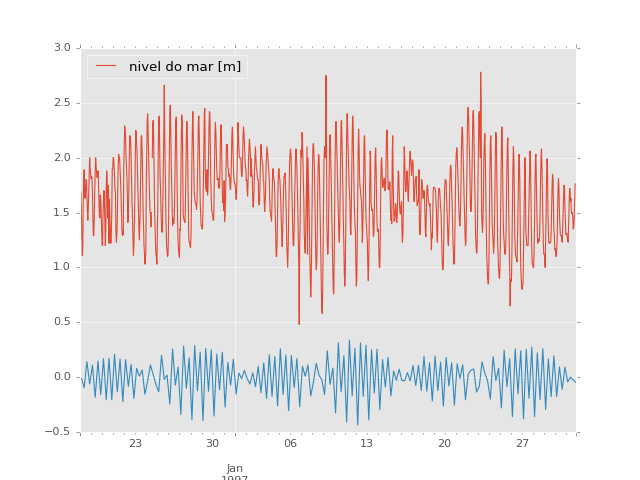

In [180]:
# importar dados observados
bndo = pickle.load(open(BASE_DIR+'rotinas/terminalGuaiba_Verao.pkl', 'r'))

# recortar os dados observados para o periodo de validacao
observ = bndo['1996-12-17 03:00':'1997-01-31 21:00']
# observ = observ.resample('6H').mean()
observ.plot()

In [158]:
observ['nivel do mar [m]'][0:2].values

array([ 1.6,  1.7])

In [159]:
# tentando fazer resample manualmnete para manter coerência de datetime
dado = [0.]

for i in np.arange(observ.shape[0]/6):
    media = np.mean(observ[i:i+6].values)
    dado.append(media)
    
dado

[0.0,
 1.4833333333333334,
 1.4116666666666664,
 1.3950000000000002,
 1.4166666666666667,
 1.4816666666666667,
 1.5466666666666666,
 1.6333333333333335,
 1.7216666666666665,
 1.7550000000000001,
 1.7516666666666669,
 1.7116666666666667,
 1.6816666666666666,
 1.6483333333333332,
 1.6216666666666668,
 1.6049999999999998,
 1.6200000000000001,
 1.6783333333333335,
 1.7433333333333332,
 1.8133333333333332,
 1.8583333333333334,
 1.8799999999999999,
 1.8683333333333334,
 1.8183333333333334,
 1.7449999999999999,
 1.6516666666666666,
 1.5650000000000002,
 1.5066666666666668,
 1.4866666666666666,
 1.5166666666666666,
 1.6066666666666667,
 1.7116666666666667,
 1.8066666666666666,
 1.8633333333333333,
 1.885,
 1.8849999999999998,
 1.8500000000000003,
 1.8,
 1.7350000000000003,
 1.6733333333333331,
 1.6449999999999998,
 1.6033333333333335,
 1.5549999999999999,
 1.5066666666666666,
 1.4616666666666667,
 1.4199999999999999,
 1.3916666666666666,
 1.3866666666666667,
 1.4199999999999999,
 1.46500000000

In [160]:
observ.shape, val.shape, len(dado)

((1078, 1), (180, 1), 180)

### Juntando dados observados e modelados

In [161]:
val['observed'] = dado

val.head()

/home/tparente/anaconda2/envs/danilo/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,modeled,observed
1996-12-18 03:00:00,-0.009767,0.000000
1996-12-18 09:00:00,-0.095834,1.483333
1996-12-18 15:00:00,0.142225,1.411667
1996-12-18 21:00:00,-0.062567,1.395000
1996-12-19 03:00:00,0.109873,1.416667


In [162]:
val['observed'] = val['observed'] - val['observed'].mean()

/home/tparente/anaconda2/envs/danilo/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
val.head()

,modeled,observed
1996-12-18 03:00:00,-0.009767,NaN
1996-12-18 09:00:00,-0.095834,-0.181408
1996-12-18 15:00:00,0.142225,-0.253075
1996-12-18 21:00:00,-0.062567,-0.269741
1996-12-19 03:00:00,0.109873,-0.248075


/home/tparente/anaconda2/envs/danilo/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


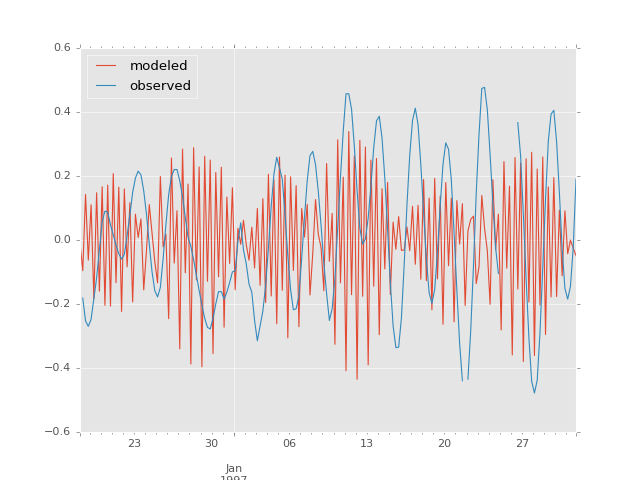

In [182]:
val[val < -.5] = np.nan

val.plot()